In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

X=np.random.normal(0,1,100)
Y=np.array([0]*80+[1]*20)

df=pd.DataFrame(np.vstack((X,Y)).transpose(),columns=['X','Y'])
df.head()

,X,Y
0,1.764052,0.0
1,0.400157,0.0
2,0.978738,0.0
3,2.240893,0.0
4,1.867558,0.0


In [3]:
df.Y.value_counts()

0.0    80
1.0    20
Name: Y, dtype: int64

In [4]:
X=df[['X']]
y=df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf=LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8

In [5]:
clf.coef_[0][0], clf.intercept_[0]

(0.35156050332996985, -1.4336391384747513)

In [6]:
def logistic(X):
    return 1/(1+np.exp(-X))

logistic(0)

0.5

In [7]:
np.random.seed(0)

X=np.random.normal(0,1,100)
Y=np.array([0]*80+[1]*20)

In [8]:
def gradient(X,Y,w,b):
    y_cap=w*X+b
    dw=sum((logistic(y_cap)-Y)*X)
    db=sum((logistic(y_cap)-Y))
    
    return dw, db

def get_loss(X,Y,w,b):
    a=logistic(w*X+b)
    return -sum(Y*np.log(a)+(1-Y)*np.log(1-a))

def logistic_regression(X,Y,w_init, b_init, alpha, beta):
    w=w_init
    b=b_init
    
    epsilon=10E-5
    W=[]
    B=[]
    COSTS=[]
    
    dw=1
    db=1
    
    n_iter=0
    while (abs(dw)>epsilon and abs(db)>epsilon):
        dw, db = gradient(X,Y,w,b)
        
        w=w-dw*alpha
        b=b-db*alpha
        
        cost=get_loss(X,Y,w,b)
        
        W.append(w)
        B.append(b)
        COSTS.append(cost)
        
        n_iter+=1
    return W, B, COSTS, n_iter 

w_init=5
b_init=10
alpha=10E-3
beta=10E-3
W, B, COSTS, n_iter=logistic_regression(X,y,w_init, b_init, alpha, beta)

W[-1], B[-1], COSTS[-1], n_iter

(0.4593728185125227, -1.4764051612662148, 48.40710021094712, 103)

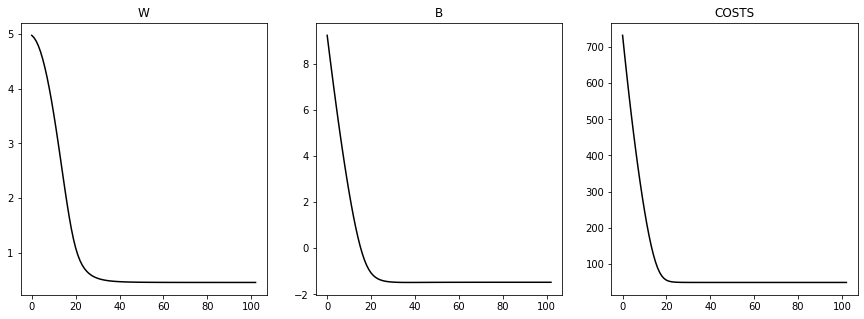

In [9]:
fig=plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title('W')
plt.plot(W,c='k')

plt.subplot(132)
plt.title('B')
plt.plot(B,c='k')

plt.subplot(133)
plt.title('COSTS')
plt.plot(COSTS,c='k')

plt.show()